In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import clear_output
import sys
import rich
import pickle


import xobjects as xo
import xtrack as xt
import xpart as xp

sys.path.append('../')
import BBStudies.Tracking.XsuitePlus as xPlus
import BBStudies.Tracking.InteractionPoint as inp
import BBStudies.Physics.Detuning as dtune
import BBStudies.Physics.Base as phys
import BBStudies.Plotting.BBPlots as bbplt
import BBStudies.Physics.Constants as cst



coordinates = pd.read_pickle('pickle_footprint/coordinates.pkl')

with open(f'pickle_footprint/tracked_ref.pkl','rb') as f:
        tracked_ref = pickle.load(f)

with open(f'pickle_footprint/tracked_HO.pkl','rb') as f:
        tracked_HO = pickle.load(f)



tracking_results = []
for i in range(1,25+1):
    with open(f'pickle_footprint/single_lr_{str(i).zfill(2)}.pkl','rb') as f:
        loaded_obj = pickle.load(f)
    tracking_results.append(loaded_obj)
    print(f'pickle_footprint/single_lr_{str(i).zfill(2)}.pkl')
#tracking_results

pickle_footprint/single_lr_01.pkl
pickle_footprint/single_lr_02.pkl
pickle_footprint/single_lr_03.pkl
pickle_footprint/single_lr_04.pkl
pickle_footprint/single_lr_05.pkl
pickle_footprint/single_lr_06.pkl
pickle_footprint/single_lr_07.pkl
pickle_footprint/single_lr_08.pkl
pickle_footprint/single_lr_09.pkl
pickle_footprint/single_lr_10.pkl
pickle_footprint/single_lr_11.pkl
pickle_footprint/single_lr_12.pkl
pickle_footprint/single_lr_13.pkl
pickle_footprint/single_lr_14.pkl
pickle_footprint/single_lr_15.pkl
pickle_footprint/single_lr_16.pkl
pickle_footprint/single_lr_17.pkl
pickle_footprint/single_lr_18.pkl
pickle_footprint/single_lr_19.pkl
pickle_footprint/single_lr_20.pkl
pickle_footprint/single_lr_21.pkl
pickle_footprint/single_lr_22.pkl
pickle_footprint/single_lr_23.pkl
pickle_footprint/single_lr_24.pkl
pickle_footprint/single_lr_25.pkl


In [2]:
# Generating tunes to speed up plotting
METHOD    = 'pynaff'

for idx,tracked in enumerate(tracking_results + [tracked_HO]):
    print(idx)
    tracked._tunesMTD     = METHOD
    tracked_ref._tunesMTD = METHOD
    _ = tracked.tunes_n['Qx']

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25


0.3989422804014327

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


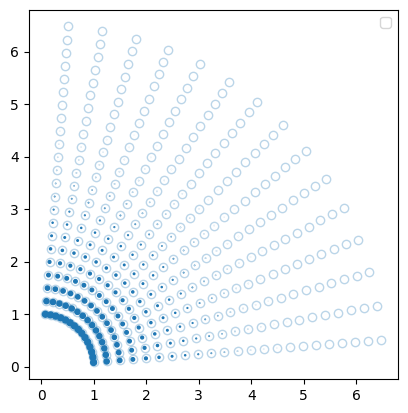

In [25]:
import scipy.stats as sciStat


plt.figure()
plt.plot(coordinates['x_sig'],coordinates['y_sig'],'o',color='C0',mfc='none',alpha=0.3)
plt.scatter(coordinates['x_sig'],coordinates['y_sig'],s = 30*sciStat.norm.pdf(coordinates['r_sig'])/sciStat.norm.pdf(0))
plt.axis('square')
plt.legend()
plt.savefig('footprint_coordinates.png',format='png',dpi=300)

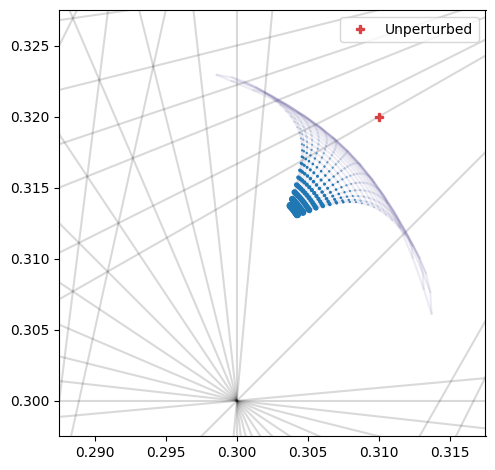

In [26]:
window    = 0.03
Qx_0,Qy_0 = 0.31, 0.32
Qx_lim    = [Qx_0-3*window/4,Qx_0+window/4]
Qy_lim    = [Qy_0-3*window/4,Qy_0+window/4]

# Plotting



# ALL PARTICLES
chosen_particles = (coordinates['r_sig']>0)

Qx_tot = np.zeros(len(coordinates[chosen_particles]))+ Qx_0
Qy_tot = np.zeros(len(coordinates[chosen_particles]))+ Qy_0
plt.figure()
bbplt.workingDiagram(order=12,Qx_range=Qx_lim,Qy_range = Qy_lim,alpha=0.15)
#---------------
for idx,tracked in enumerate(tracking_results[::-1] + [tracked_HO]):
    dQx = tracked.tunes_n[chosen_particles]['Qx'] - tracked_ref.tunes_n[chosen_particles]['Qx']
    dQy = tracked.tunes_n[chosen_particles]['Qy'] - tracked_ref.tunes_n[chosen_particles]['Qy']
    Qx_tot += dQx
    Qy_tot += dQy
#---------------

bbplt.polarmesh(Qx_tot,Qy_tot,alpha=0.1,r=coordinates[chosen_particles]['r_sig'],theta=coordinates[chosen_particles]['theta_sig'],color='darkslateblue')
plt.scatter(Qx_tot,Qy_tot,s = 30*sciStat.norm.pdf(coordinates['r_sig'])/sciStat.norm.pdf(0),zorder=10)
plt.plot(Qx_0,Qy_0,'P',color='C3',alpha=0.8,label='Unperturbed')

plt.legend(loc='upper right')
plt.axis('square')
plt.xlim(Qx_lim)
plt.ylim(Qy_lim)
plt.tight_layout()

plt.savefig('footprint_TOTAL.png',format='png',dpi=300)


In [6]:
window    = 0.03
Qx_0,Qy_0 = 0.31, 0.32
Qx_lim    = [Qx_0-3*window/4,Qx_0+window/4]
Qy_lim    = [Qy_0-3*window/4,Qy_0+window/4]

# Plotting

gif_amplitude = bbplt.GIF('footprint_single_amplitude.gif',fps=5)

for sig_max in coordinates.groupby('r_sig').groups.keys():

    chosen_particles = (coordinates['r_sig']<=sig_max)

    Qx_tot = np.zeros(len(coordinates[chosen_particles]))+ Qx_0
    Qy_tot = np.zeros(len(coordinates[chosen_particles]))+ Qy_0
    plt.figure()
    bbplt.workingDiagram(order=12,Qx_range=Qx_lim,Qy_range = Qy_lim,alpha=0.15)
    #---------------
    for idx,tracked in enumerate(tracking_results[::-1] + [tracked_HO]):
        dQx = tracked.tunes_n[chosen_particles]['Qx'] - tracked_ref.tunes_n[chosen_particles]['Qx']
        dQy = tracked.tunes_n[chosen_particles]['Qy'] - tracked_ref.tunes_n[chosen_particles]['Qy']
        Qx_tot += dQx
        Qy_tot += dQy
    #---------------

    bbplt.polarmesh(Qx_tot,Qy_tot,r=coordinates[chosen_particles]['r_sig'],theta=coordinates[chosen_particles]['theta_sig'],color='darkslateblue')
    plt.plot(Qx_tot,Qy_tot,'.',alpha=0.5)
    plt.plot(Qx_0,Qy_0,'P',color='C3',alpha=0.8,label='Unperturbed')

    plt.legend(loc='upper right')
    plt.axis('square')
    plt.xlim(Qx_lim)
    plt.ylim(Qy_lim)
    plt.tight_layout()

    gif_amplitude.add_frame()
    plt.close()

gif_amplitude.publish(keepframes=True)

MovieWriter ffmpeg unavailable; using Pillow instead.


In [7]:
window    = 0.03
Qx_0,Qy_0 = 0.31, 0.32
Qx_lim    = [Qx_0-3*window/4,Qx_0+window/4]
Qy_lim    = [Qy_0-3*window/4,Qy_0+window/4]

# Plotting

gif_amplitude = bbplt.GIF('footprint_single_lr.gif',fps=5)

for lr_num in range(1,25+1):

    # ALL PARTICLES
    chosen_particles = (coordinates['r_sig']>0)

    Qx_tot = np.zeros(len(coordinates[chosen_particles]))+ Qx_0
    Qy_tot = np.zeros(len(coordinates[chosen_particles]))+ Qy_0
    plt.figure()
    bbplt.workingDiagram(order=12,Qx_range=Qx_lim,Qy_range = Qy_lim,alpha=0.15)
    #---------------
    for idx,tracked in enumerate(tracking_results[::-1][:lr_num-1] + [tracked_HO]):
        dQx = tracked.tunes_n[chosen_particles]['Qx'] - tracked_ref.tunes_n[chosen_particles]['Qx']
        dQy = tracked.tunes_n[chosen_particles]['Qy'] - tracked_ref.tunes_n[chosen_particles]['Qy']
        Qx_tot += dQx
        Qy_tot += dQy
    #---------------

    bbplt.polarmesh(Qx_tot,Qy_tot,r=coordinates[chosen_particles]['r_sig'],theta=coordinates[chosen_particles]['theta_sig'],color='darkslateblue')
    plt.plot(Qx_tot,Qy_tot,'.',alpha=0.5)
    plt.plot(Qx_0,Qy_0,'P',color='C3',alpha=0.8,label='Unperturbed')

    plt.legend(loc='upper right')
    plt.axis('square')
    plt.xlim(Qx_lim)
    plt.ylim(Qy_lim)
    plt.tight_layout()

    gif_amplitude.add_frame()
    plt.close()

gif_amplitude.publish(keepframes=True)

MovieWriter ffmpeg unavailable; using Pillow instead.
